# Table of Contents

# Introduction

# Load Packages

In [1]:
import os
import json
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Dataset

## Load Data

In [4]:
data_path = '../data'

In [5]:
movies_df = pd.read_csv(os.path.join(data_path, 'tmdb_5000_movies.csv'))
credits_df = pd.read_csv(os.path.join(data_path, 'tmdb_5000_credits.csv'))

**Movies Dataset (movies_df):**

This dataset contains information about various movies, including their budget, genres, homepage, keywords, original language, title, overview, popularity, production companies, production countries, release date, revenue, runtime, spoken languages, status, tagline, vote average, and vote count.

- `budget`: The budget allocated for the movie production.
- `genres`: The genres of the movie (e.g., action, comedy, drama).
- `homepage`: The URL of the movie's homepage.
- `id`: Unique identifier for the movie.
- `keywords`: The keywords or tags related to the movie.
- `original_language`: The original language of the movie.
- `original_title`: The original title of the movie (before translation or adaptation).
- `overview`: A brief description or summary of the movie.
- `popularity`: A numeric quantity specifying the movie popularity.
- `production_companies`: The production companies involved in making the movie.
- `production_countries`: The countries where the movie was produced.
- `release_date`: The release date of the movie.
- `revenue`: The worldwide revenue generated by the movie.
- `runtime`: The duration of the movie in minutes.
- `spoken_languages`: The languages spoken in the movie.
- `status`: The status of the movie (e.g., Released, Rumored).
- `tagline`: A tagline or slogan associated with the movie.
- `title`: The title of the movie.
- `vote_average`: The average rating given to the movie by users.
- `vote_count`: The number of votes cast for the movie.

**Credits Dataset (credits_df):**

This dataset contains information about movie credits, including the movie ID, title, cast, and crew.

- `movie_id`: Unique identifier for the movie.
- `title`: The title of the movie.
- `cast`: Information about the cast members (e.g., actors, actresses) involved in the movie.
- `crew`: Information about the crew members (e.g., directors, producers, writers) involved in the movie.

These datasets provide valuable insights into the characteristics of movies, their production details, and the people involved in their creation. Analyzing these datasets together can help in understanding factors influencing movie success and building recommendation systems based on movie attributes and credits.

## Data summary

In [6]:
# Check dimensions of the dataset
print("Dimensions of the movies dataset:", movies_df.shape)
print("Dimensions of the credits dataset:", credits_df.shape)

Dimensions of the movies dataset: (4803, 20)
Dimensions of the credits dataset: (4803, 4)


In [14]:
# Display the first few rows of the movies dataset
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
# Display the first few rows of the credits dataset
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [230]:
print('ID\n', (credits_df['movie_id']==movies_df['id']).describe(), '\n')
print('Title\n', (credits_df['title']==movies_df['title']).describe())

ID
 count     4803
unique       1
top       True
freq      4803
dtype: object 

Title
 count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object


Given the findings from the comparisons of this two dataset, I proceeded to merge the two DataFrames, `movies_df` and `credits_df`, using an inner join based on the 'id' and 'title' columns. The merged DataFrame, named `merged_df`, contains information from both DataFrames. Since the 'movie_id' and 'id' columns contained the same values, I dropped the 'movie_id' column after merging to avoid redundancy.

In [7]:
# Merge the two datasets on the 'id' and 'movie_id' columns, and 'title' and 'original_title' columns respectively
merged_df = pd.merge(movies_df, credits_df, left_on=['id', 'title'], right_on=['movie_id', 'title'], how='inner')

# Drop the 'movie_id' column after merging
merged_df.drop(columns=['movie_id'], inplace=True)

In [91]:
# Display the first few rows of the merged dataset
merged_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [43]:
# Check dimensions of the dataset
print("Dimensions of the dataset after merging:", merged_df.shape)

Dimensions of the dataset after merging: (4803, 22)


In [46]:
# Print information about the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [49]:
merged_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [97]:
# Check for missing values
merged_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [52]:
# Check for duplicated values
merged_df.duplicated().sum()

0

In this cell, I compute the correlation matrix to explore the relationships between numerical features in the dataset. The correlation matrix helps us identify any significant correlations between variables, which can provide insights into the underlying patterns in the data.

Next, I visualize the correlation matrix using a heatmap plot. This heatmap provides a graphical representation of the correlation coefficients, making it easier to interpret the relationships between variables. The variables with darker color means their correlation is more.

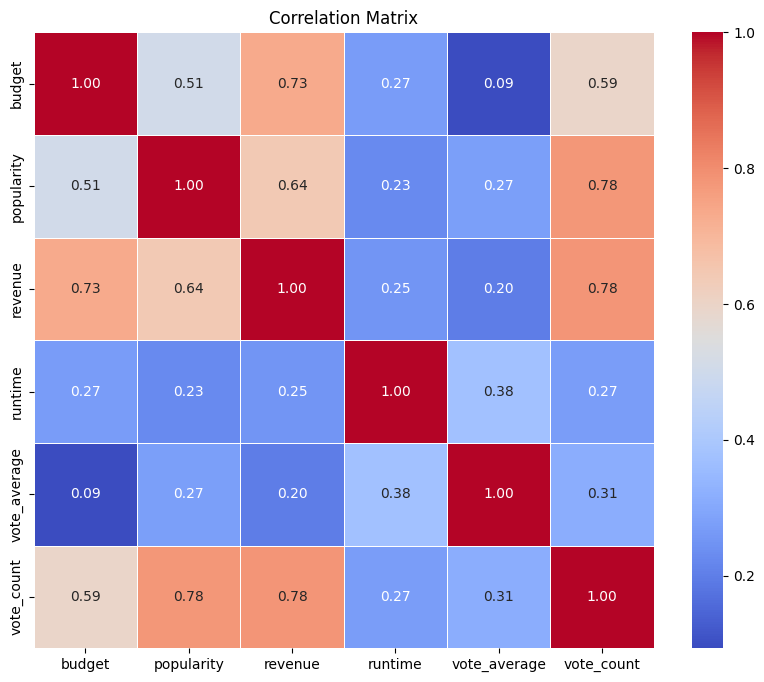

In [61]:
# Select only the numerical columns for correlation analysis
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64'])
numerical_columns.drop(columns=['id'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Cleaning and Preprocessing

## JSON Handling

To handle columns in JSON format (genres, keywords, production_countries, production_companies, spoken_languages, cast, crew), I use the json module in Python to parse the JSON strings into Python objects (lists). 

In [8]:
# Define a function to parse JSON strings
def parse_json(json_string):
    try:
        # If the string is not empty or not '[]', parse it into a Python object
        if pd.notna(json_string) and json_string != '[]':
            return json.loads(json_string)
        else:
            return None
    except json.JSONDecodeError:
        # If there's an error in decoding JSON, return None
        return None

# Apply the parse_json function to columns containing JSON strings
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    merged_df[column] = merged_df[column].apply(parse_json)

# Display the parsed JSON data for the first row
print("Parsed JSON data for the first row:")
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages', 'cast', 'crew']:
    print(f"{column}: {merged_df[column][0][:5]}", "\n")


Parsed JSON data for the first row:
genres: [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}] 

keywords: [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}] 

production_countries: [{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}] 

production_companies: [{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune Entertainment', 'id': 444}, {'name': 'Lightstorm Entertainment', 'id': 574}] 

spoken_languages: [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}] 

cast: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id':

In [9]:
# Define a function to extract IDs from JSON data
def extract_ids(json_data):
    if isinstance(json_data, list):
        return [entry['id'] for entry in json_data]
    else:
        return []


# Apply the extract_ids function to 'genres', 'keywords', and 'production_companies' columns
for column in ['genres', 'keywords', 'production_companies']:
    merged_df[column + '_id'] = merged_df[column].apply(extract_ids)

# Display the first row of the DataFrame with the new columns
print("Updated columns:")
for column in ['genres_id', 'keywords_id', 'production_companies_id']:
    print(f"{column.capitalize()}: {merged_df[column][0]}")


Updated columns:
Genres_id: [28, 12, 14, 878]
Keywords_id: [1463, 2964, 3386, 3388, 3679, 3801, 9685, 9840, 9882, 9951, 10148, 10158, 10987, 11399, 13065, 14643, 14720, 165431, 193554, 206690, 209714]
Production_companies_id: [289, 306, 444, 574]


In [10]:
# Extract relevant information (names) from parsed JSON data (except cast and crew)
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']:
    merged_df[column] = merged_df[column].apply(lambda x: [item['name'] for item in x] if x is not None else [])

# Display the updated columns
print("Updated columns:")
for column in ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']:
    print(f"{column.capitalize()}: {merged_df[column][0]}")


Updated columns:
Genres: ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
Keywords: ['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']
Production_countries: ['United States of America', 'United Kingdom']
Production_companies: ['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']
Spoken_languages: ['English', 'Español']


In [11]:
# Extract relevant information from the cast column
merged_df['cast'] = merged_df['cast'].apply(lambda x: [{'name': member['name'], 'gender': member['gender'], 'cast_id': member['id'],
                                                        'order': member['order']} for member in x] if x is not None else [])

# Extract relevant information from the crew column
merged_df['crew'] = merged_df['crew'].apply(lambda x: [{'name': member['name'], 'department': member['department'],
                                                        'job': member['job'], 'gender': member['gender'], 'crew_id': member['id']
                                                        } for member in x] if x is not None else [])

# Display the updated columns
print("Updated columns:")
print("Cast:", merged_df['cast'][0][:5])
print("Crew:", merged_df['crew'][0][:5])

Updated columns:
Cast: [{'name': 'Sam Worthington', 'gender': 2, 'cast_id': 65731, 'order': 0}, {'name': 'Zoe Saldana', 'gender': 1, 'cast_id': 8691, 'order': 1}, {'name': 'Sigourney Weaver', 'gender': 1, 'cast_id': 10205, 'order': 2}, {'name': 'Stephen Lang', 'gender': 2, 'cast_id': 32747, 'order': 3}, {'name': 'Michelle Rodriguez', 'gender': 1, 'cast_id': 17647, 'order': 4}]
Crew: [{'name': 'Stephen E. Rivkin', 'department': 'Editing', 'job': 'Editor', 'gender': 0, 'crew_id': 1721}, {'name': 'Rick Carter', 'department': 'Art', 'job': 'Production Design', 'gender': 2, 'crew_id': 496}, {'name': 'Christopher Boyes', 'department': 'Sound', 'job': 'Sound Designer', 'gender': 0, 'crew_id': 900}, {'name': 'Christopher Boyes', 'department': 'Sound', 'job': 'Supervising Sound Editor', 'gender': 0, 'crew_id': 900}, {'name': 'Mali Finn', 'department': 'Production', 'job': 'Casting', 'gender': 1, 'crew_id': 1262}]


## Zero Values

In [138]:
merged_df.apply(lambda x: sum(x==0),axis=0)

budget                  1037
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 1
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                   35
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              63
vote_count                62
cast                       0
crew                       0
dtype: int64

In [213]:
# Set movie budgets with zero values to None
# merged_df.loc[merged_df['budget'] == 0, 'budget'] = None

In [ ]:
# Replace budgets and revenue with zero values to median


## Released Date

In [12]:
# Convert release_date column to datetime format
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], format ='%Y-%m-%d')

In [13]:
# Extracting month and year enables easier analysis based on the release date of the movies
# Extract month from the release_date column
merged_df['release_month'] = merged_df['release_date'].dt.month

# Extract the year from the release_date column
merged_df['release_year'] = merged_df['release_date'].dt.year

## Feature Selection

In [14]:
# Calculate profit as our target
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']

In [21]:
# # Dropping columns 'homepage', 'spoken_language', 'original_title', 'status', 'tagline' from the DataFrame
# The dropped columns might be considered irrelevant or redundant for the analysis
newCols = ['id', 'title', 'release_date', 'release_year', 'release_month',
           'popularity', 'vote_average', 'vote_count', 'budget', 'revenue',
           'profit', 'genres', 'genres_id', 'keywords', 'keywords_id', 'cast',
           'crew', 'original_language', 'runtime', 'production_companies',
           'production_companies_id', 'production_countries']

df = merged_df[newCols]

In [22]:
# Extract cast_id from the 'cast' column
df['cast_id'] = df['cast'].apply(lambda x: [actor['cast_id'] for actor in x])
# Extract only cast with order of 0 from cast_id
df['cast_id'] = df['cast_id'].apply(lambda x: x[0] if len(x) > 0 else None)

# Extract crew_id for directors from the 'crew' column
df['director_id'] = df['crew'].apply(lambda x: [member['crew_id'] for member in x if member['job'] == 'Director'])
df['director_id'] = df['director_id'].apply(lambda x: x[0] if len(x) > 0 else None)

In [23]:
# DataFrame information after data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4803 non-null   int64         
 1   title                    4803 non-null   object        
 2   release_date             4802 non-null   datetime64[ns]
 3   release_year             4802 non-null   float64       
 4   release_month            4802 non-null   float64       
 5   popularity               4803 non-null   float64       
 6   vote_average             4803 non-null   float64       
 7   vote_count               4803 non-null   int64         
 8   budget                   4803 non-null   int64         
 9   revenue                  4803 non-null   int64         
 10  profit                   4803 non-null   int64         
 11  genres                   4803 non-null   object        
 12  genres_id                4803 non-

## Missing Values

In [24]:
# Check for missing values after data preprocessing
df.isnull().sum()

id                          0
title                       0
release_date                1
release_year                1
release_month               1
popularity                  0
vote_average                0
vote_count                  0
budget                      0
revenue                     0
profit                      0
genres                      0
genres_id                   0
keywords                    0
keywords_id                 0
cast                        0
crew                        0
original_language           0
runtime                     2
production_companies        0
production_companies_id     0
production_countries        0
cast_id                    43
director_id                30
dtype: int64

In [25]:
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [260]:
df.loc[df.release_date.isnull()]

,id,title,release_date,release_year,release_month,popularity,vote_average,vote_count,budget,revenue,...,genres_id,keywords,keywords_id,cast,crew,spoken_languages,runtime,production_companies,production_companies_id,production_countries
4553,380097,America Is Still the Place,NaT,NaN,NaN,0.0,0.0,0,0,0,...,[],[],[],[],[],[],0.0,[],[],[]


Since the row with the missing release date also has missing values in most other columns, it's reasonable to drop this row from our dataset. This ensures that our analysis is based on complete and reliable data, improving the accuracy of our findings.

In [27]:
# Drop rows with missing values in the 'release_date' column
df = df.dropna(subset=['release_date', 'release_month', 'release_year'])

In [ ]:
# Drop rows with missing values in the 'release_date' column
# df = df.dropna(subset=['cast_id', 'director_id'])

In [28]:
print("Dimensions of the dataset after data cleaning:", df.shape)

Dimensions of the dataset after data cleaning: (4802, 24)


# Exploratory Data Analysis (EDA)

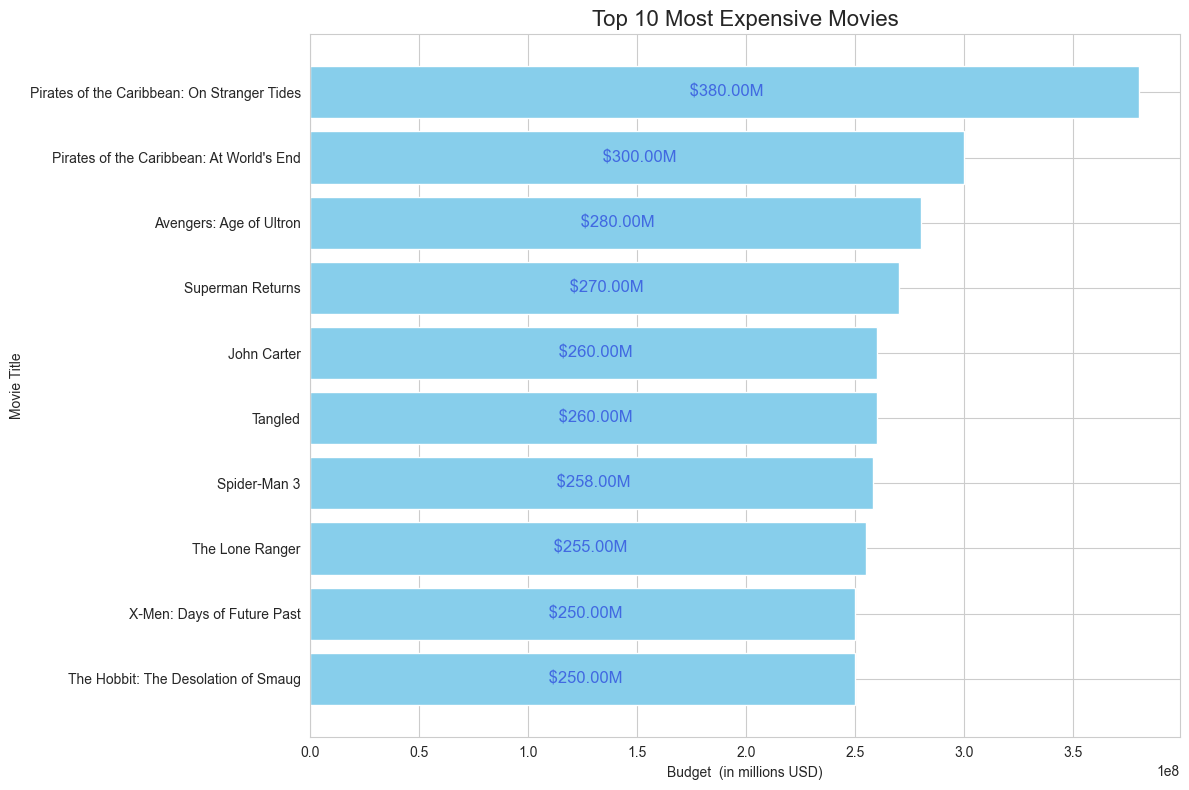

In [263]:
# Sort the DataFrame by 'budget' column in descending order
top_10_expensive = df.sort_values(by='budget', ascending=False).head(10)

# Create a bar plot for the top 10 most expensive movies
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_expensive['title'], top_10_expensive['budget'], color='skyblue')

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f' ${width/1e6:.2f}M',
             ha='center', va='center', fontsize=12, color='royalblue')

 
plt.xlabel('Budget  (in millions USD)')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Expensive Movies', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest budget at the top
plt.tight_layout()
plt.show()

In [264]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'revenue' column in descending order
top_10_grossing = df.sort_values(by='revenue', ascending=False).head(10)

# Create a bar plot for the top 10 highest grossing movies
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_grossing['title'], top_10_grossing['revenue'], color='skyblue')

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f' ${width/1e9:.2f}B',
             ha='center', va='center', fontsize=12, color='royalblue')

plt.xlabel('Revenue (in billions USD)')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Grossing Movies', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
# Extract relevant information about these movies
top_grossing_genres = top_10_grossing['genres'].explode()

# Analyze the extracted information to find commonalities or patterns
# Find the most common genre among these movies
most_common_genre = top_grossing_genres.value_counts().head(3)
print("Three of the most common genres among the top grossing movies are:")
for genre, count in most_common_genre.items():
    print("- {}: {} movies of 10".format(genre, count))

Three of the most common genres among the top grossing movies are:
- Adventure: 8 movies of 10
- Action: 7 movies of 10
- Science Fiction: 6 movies of 10


In [ ]:
# Print the directors for each movie
for index, row in top_10_grossing.iterrows():
    # Extract director information for the current movie
    top_grossing_directors = [crew_member['name'] for crew_member in
                              row['crew'] if crew_member['department'] == 'Directing']
    
    # Print movie title and directors
    print("Movie:", row['title'])
    print("Directors:", ", ".join(top_grossing_directors))
    print()


Movie: Avatar
Directors: James Cameron

Movie: Titanic
Directors: James Cameron

Movie: The Avengers
Directors: Joss Whedon, Trudy Ramirez

Movie: Jurassic World
Directors: Colin Trevorrow, Chris Castaldi, Scott Koche, Joyce McCarthy, Nathan Parker, Stockton David Porter, Zack Smith, Spencer Taylor

Movie: Furious 7
Directors: James Wan, Jody Blose, Brenda K. Wachel

Movie: Avengers: Age of Ultron
Directors: Joss Whedon

Movie: Frozen
Directors: Chris Buck, Jennifer Lee, Rick Moore, Merrick Rustia, Matsune Suzuki, Kendra Vander Vliet, Scott Armstrong

Movie: Iron Man 3
Directors: Shane Black

Movie: Minions
Directors: Kyle Balda, Pierre Coffin

Movie: Captain America: Civil War
Directors: Anthony Russo, Joe Russo, Joe Russo



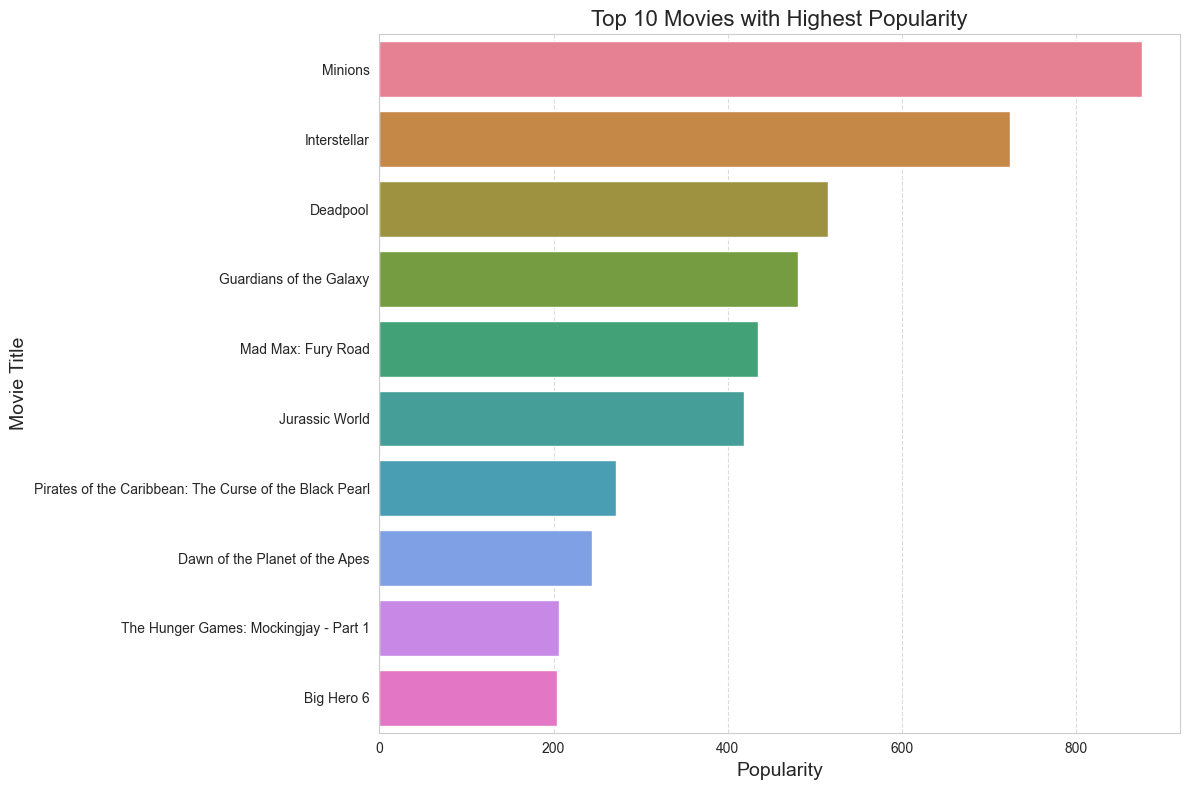

In [ ]:
# Sort the DataFrame by 'popularity' column in descending order
top_10_popular = df.sort_values(by='popularity', ascending=False).head(10)

# Set style
sns.set_style("whitegrid")

# Create color palette
colors = sns.color_palette("husl", 10)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='title', data=top_10_popular, palette=colors)

# Add labels and title
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.title('Top 10 Movies with Highest Popularity', fontsize=16)

# Adjust layout
plt.tight_layout()

plt.grid(axis='x', linestyle='--', alpha=0.7)
# Show plot
plt.show()

In [ ]:
df.columns

Index(['id', 'title', 'release_date', 'popularity', 'vote_average',
       'vote_count', 'budget', 'revenue', 'genres', 'keywords', 'cast', 'crew',
       'spoken_languages', 'runtime', 'production_companies',
       'production_countries', 'status', 'month'],
      dtype='object')

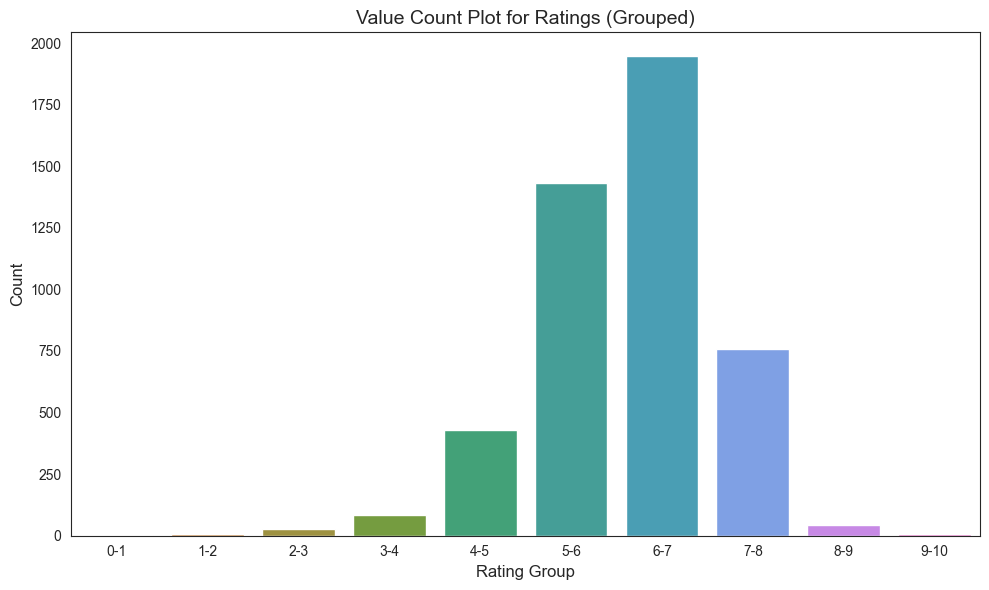

In [ ]:
# Define the bins
bins = [x for x in range(11)]

# Group the ratings into bins
df['rating_group'] = pd.cut(df['vote_average'], bins=bins, labels=[f'{i}-{i+1}' for i in range(10)])

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating_group', palette='husl')
plt.title('Value Count Plot for Ratings (Grouped)', fontsize=14)
plt.xlabel('Rating Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


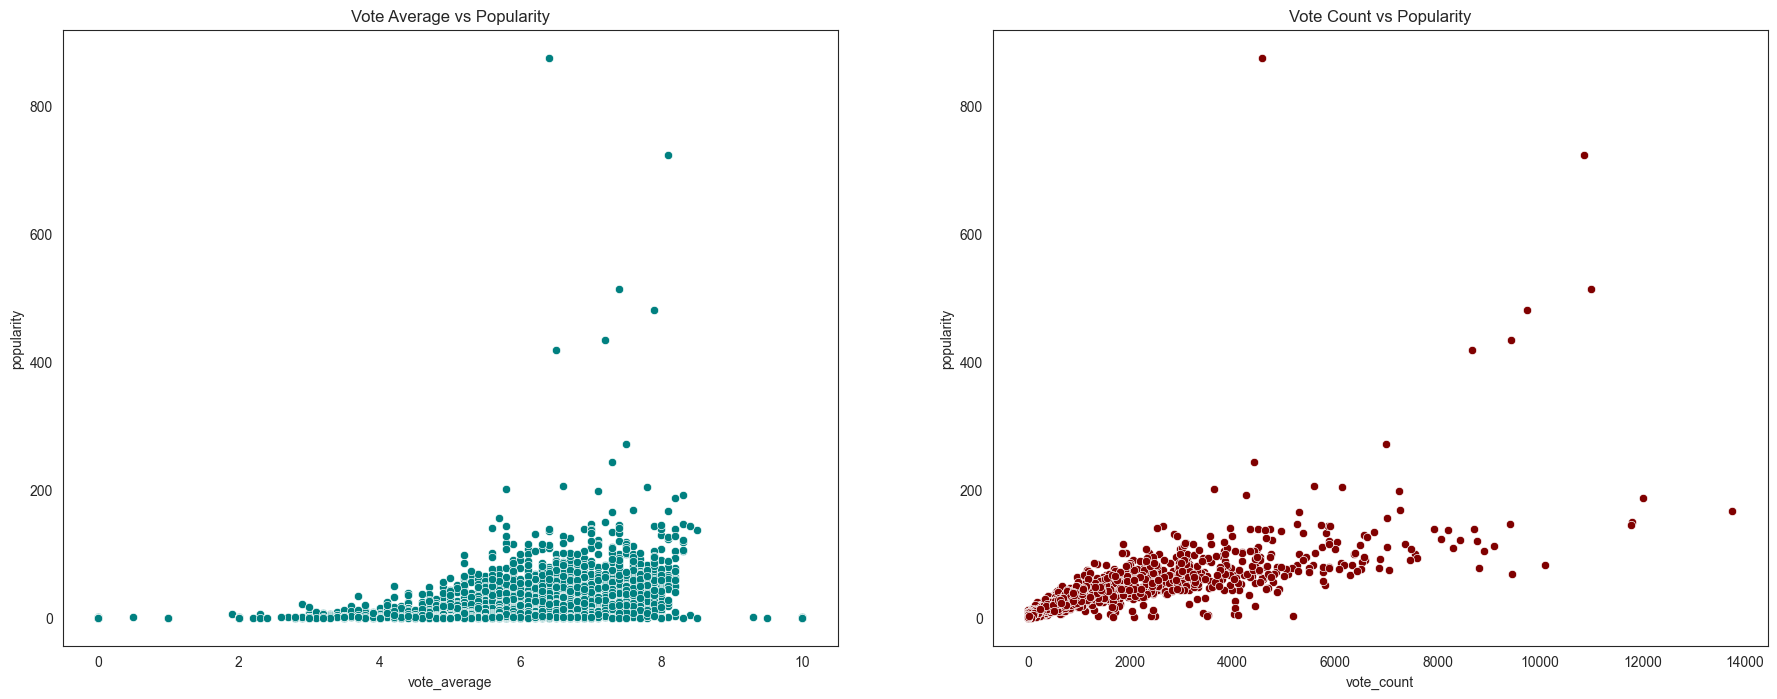

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.scatterplot(data=df, x=df['vote_average'], y=df['popularity'], ax=ax[0], color='teal')
sns.scatterplot(data=df, x=df['vote_count'], y=df['popularity'], ax=ax[1], color='maroon')

ax[0].set_title('Vote Average vs Popularity')
ax[1].set_title('Vote Count vs Popularity')

plt.show()

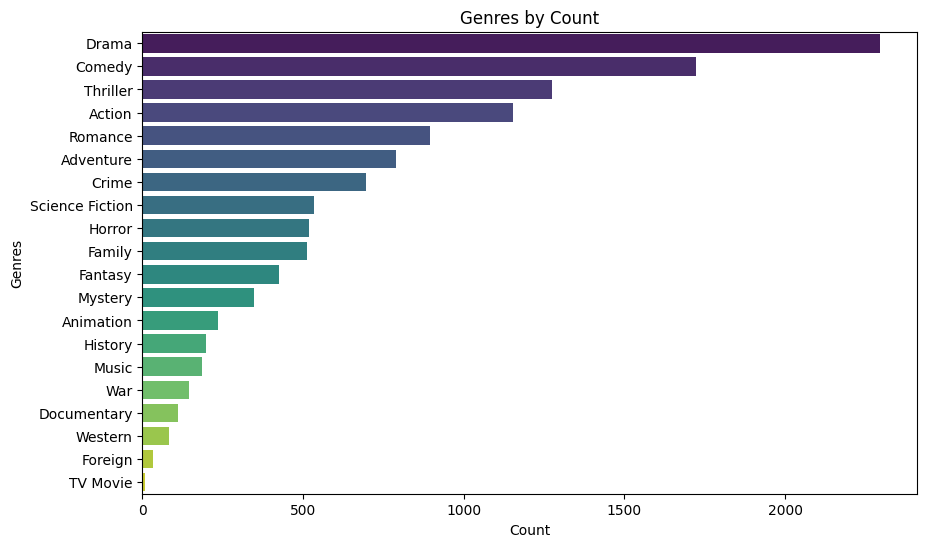

In [ ]:
# Bar chart of genres count
plt.figure(figsize=(10, 6))
genre_counts = df['genres'].explode().value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

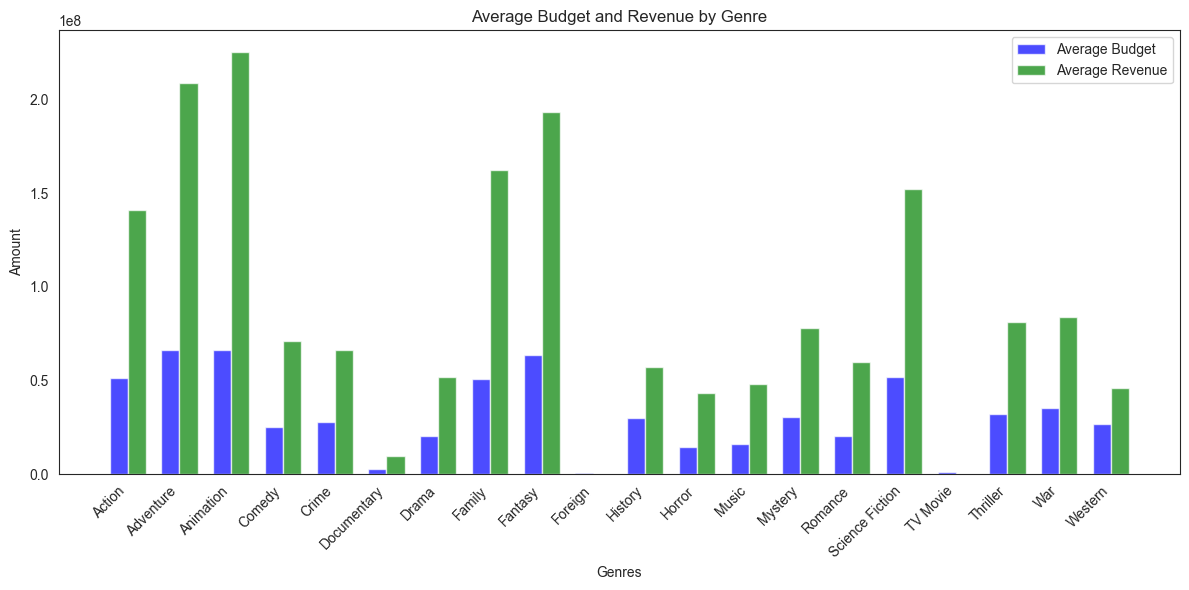

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Explode the 'genres' column
exploded_df = df.explode('genres')

# Group by genre and calculate average budget and revenue
genre_stats = exploded_df.groupby('genres').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Plot the average budget and revenue for each genre
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(genre_stats))

plt.bar(index, genre_stats['budget'], bar_width, color='blue', alpha=0.7, label='Average Budget')
plt.bar([i + bar_width for i in index], genre_stats['revenue'], bar_width, color='green', alpha=0.7, label='Average Revenue')

plt.xlabel('Genres')
plt.ylabel('Amount')
plt.title('Average Budget and Revenue by Genre')
plt.xticks([i + bar_width / 2 for i in index], genre_stats['genres'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Word clouds for textual data like keywords and genres can visualize the most common words or phrases used in movie descriptions.

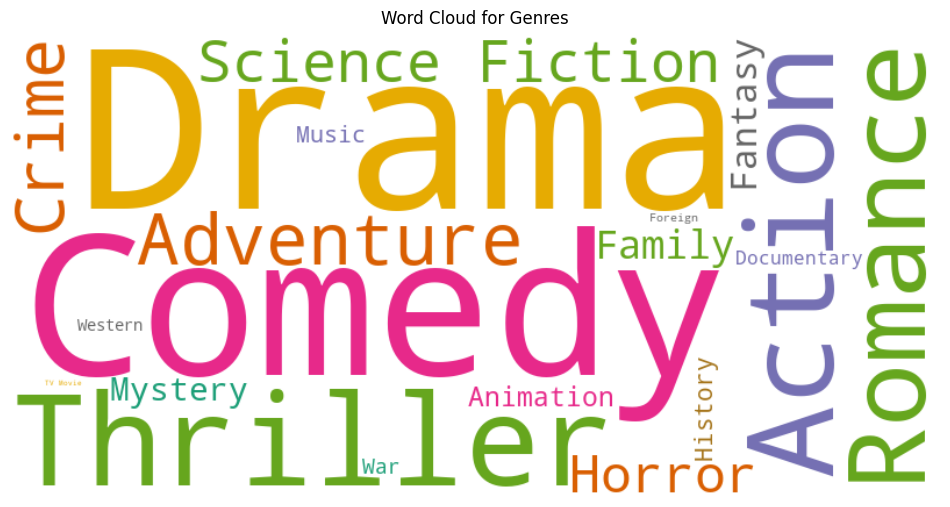

In [ ]:
# Flatten the list of genres and count the occurrences of each genre
genre_counts = df['genres'].explode().dropna().value_counts()

# Generate word cloud
genre_wordcloud = WordCloud(width=800, height=400,
                            background_color='white', colormap='Dark2'
                            ).generate_from_frequencies(genre_counts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genres')
plt.show()


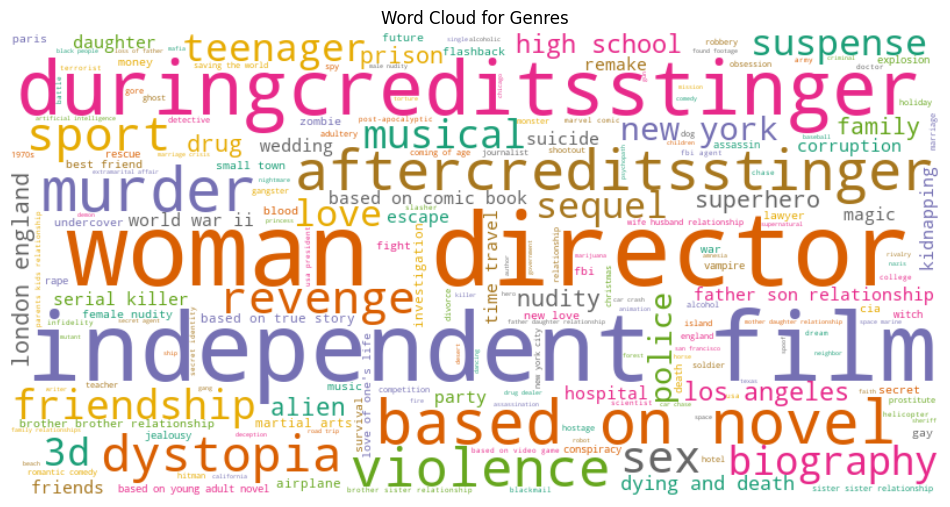

In [ ]:
# Flatten the list of keywords and count the occurrences of each one
keyword_counts = df['keywords'].explode().dropna().value_counts()

# Generate word cloud
keyword_wordcloud = WordCloud(width=800, height=400,
                              background_color='white', colormap='Dark2'
                              ).generate_from_frequencies(keyword_counts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(keyword_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Keywords')
plt.show()


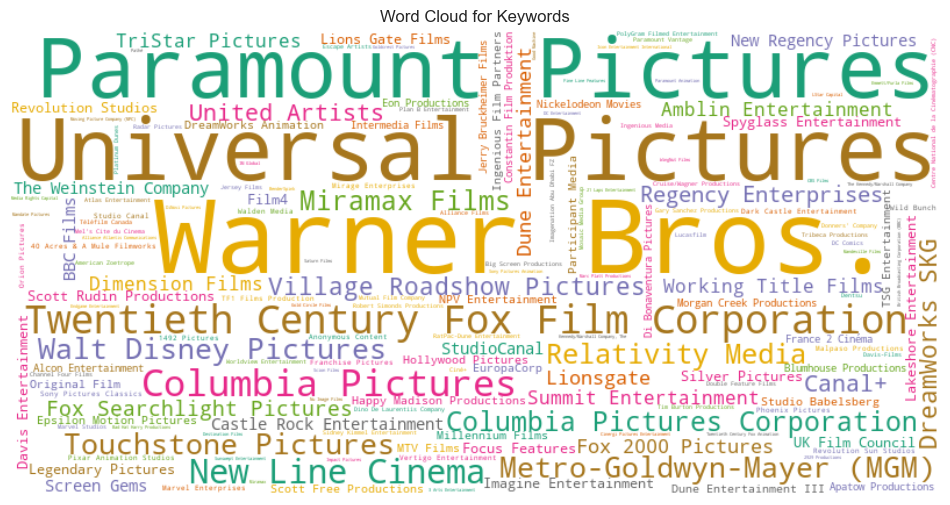

In [ ]:
# Flatten the list and count the occurrences of each one
prod_company_counts = df['production_companies'].explode().dropna().value_counts()

# Generate word cloud
prod_company_wordcloud = WordCloud(width=800, height=400,
                              background_color='white', colormap='Dark2'
                              ).generate_from_frequencies(prod_company_counts)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(prod_company_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Keywords')
plt.show()


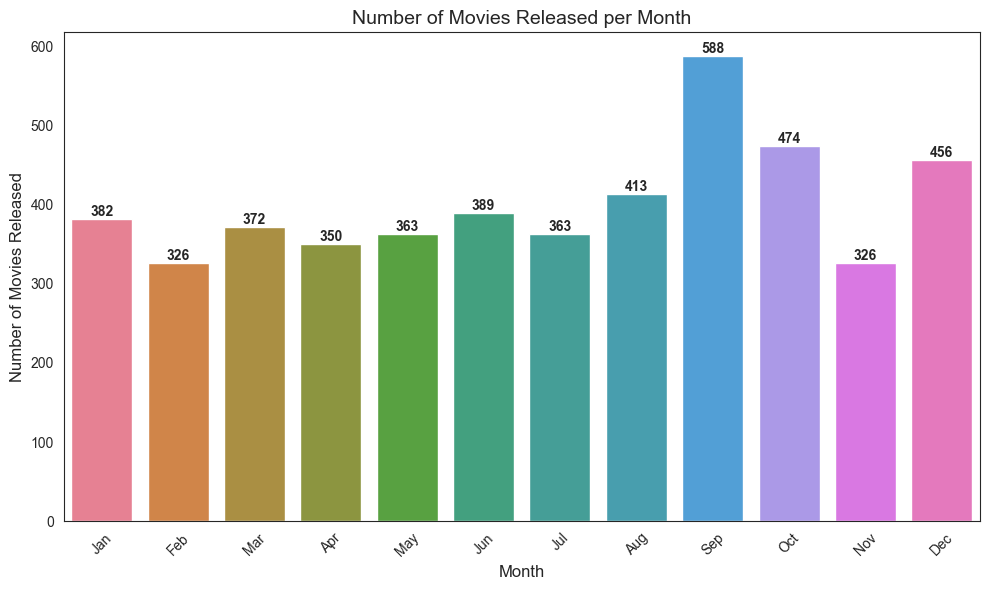

In [ ]:
# Count the number of movies released per month
movies_per_month = df['release_month'].value_counts().sort_index()

# Convert month numbers to month names
month_names = [calendar.month_abbr[month] for month in movies_per_month.index.astype(int)]

# Create color palette
colors = sns.color_palette("husl", 12)

# Plot the number of movies released per month
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=month_names, y=movies_per_month, palette=colors)
plt.title('Number of Movies Released per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.xticks(rotation=45)
# Add labels on the bars
for index, value in enumerate(movies_per_month):
    barplot.text(index, value, str(value),ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.show()


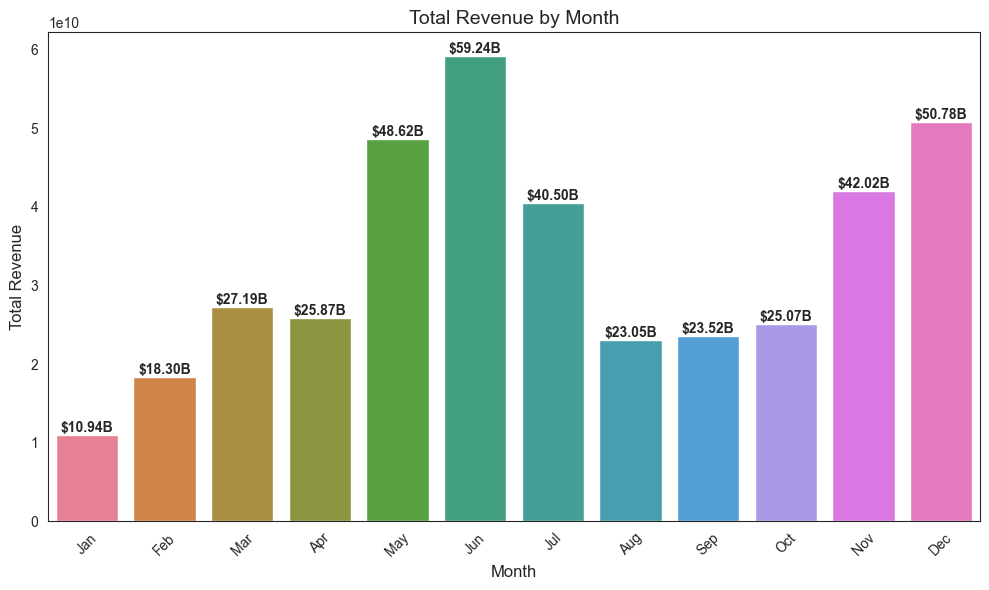

In [ ]:
# Group the data by month and calculate the total revenue
revenue_per_month = df.groupby('release_month')['revenue'].sum()

# Plot the total revenue by month
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=month_names, y=revenue_per_month, palette=colors)
plt.title('Total Revenue by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
# Add labels on the bars
for index, value in enumerate(revenue_per_month):
    barplot.text(index, value, f'${value / 1e9:.2f}B', ha='center', va='bottom', weight='bold')
plt.tight_layout()
plt.show()

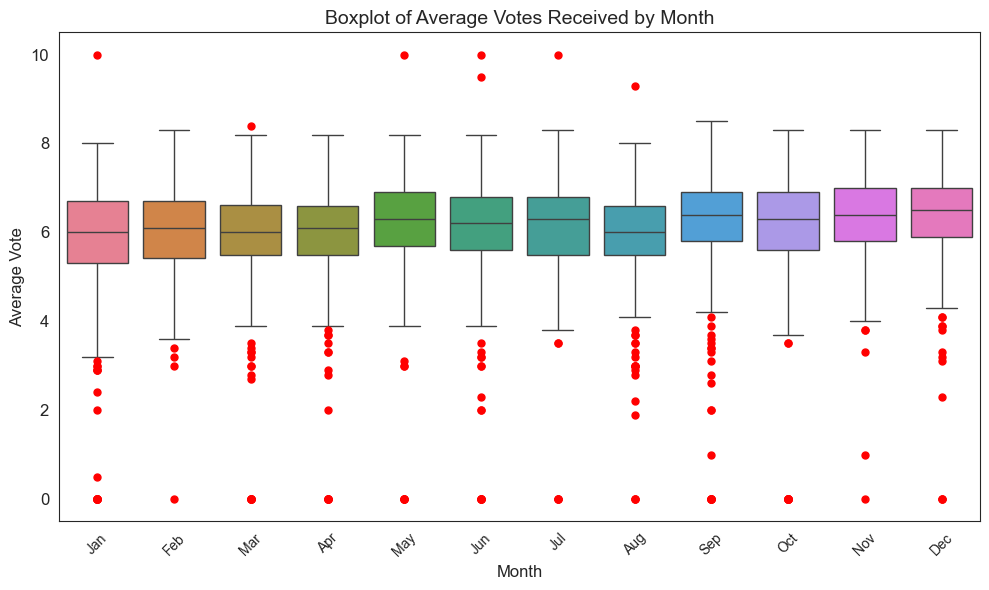

In [ ]:
# Create a boxplot of average votes received by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_month', y='vote_average', data=df, palette=colors,
            flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'))
plt.title('Boxplot of Average Votes Received by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Vote', fontsize=12)
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Some movies have a rating of 0.0 in all months, which may be a typo. I remove these values for further analysis.

In [ ]:
# Filter out movies with vote_average equal to 0
df_filtered = df[df['vote_average'] != 0]

# Calculate median, minimum, and maximum vote averages per month
vote_stats = df_filtered.groupby('release_month')['vote_average'].agg(['median', 'min', 'max']).reset_index()

# Sort the DataFrame by month
vote_stats = vote_stats.sort_values(by='release_month')

# Display the formatted statistics
print(vote_stats)


    release_month  median  min   max
0             1.0     6.0  0.5  10.0
1             2.0     6.1  3.0   8.3
2             3.0     6.0  2.7   8.4
3             4.0     6.1  2.0   8.2
4             5.0     6.3  3.0  10.0
5             6.0     6.3  2.0  10.0
6             7.0     6.3  3.5  10.0
7             8.0     6.0  1.9   9.3
8             9.0     6.4  1.0   8.5
9            10.0     6.3  3.5   8.3
10           11.0     6.4  1.0   8.3
11           12.0     6.5  2.3   8.3


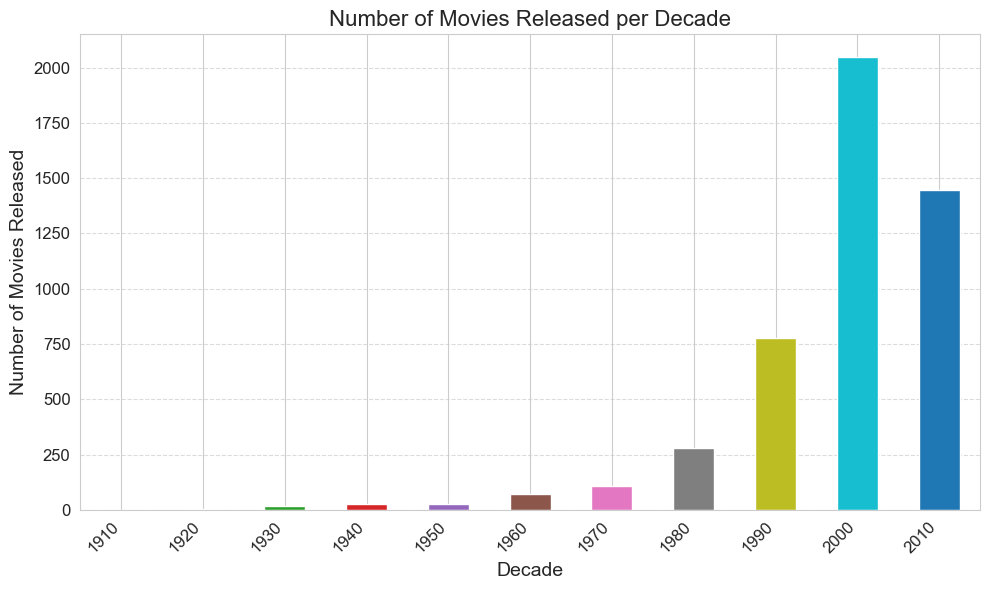

In [ ]:
# Group the movies by decade
df['decade'] = ((df['release_year'] // 10) * 10).astype(int)

# Group the movies by decade and count the number of movies in each decade
movies_per_decade = df['decade'].value_counts().sort_index()

# Define colors for the bars
colors = plt.cm.tab10.colors

# Plot the number of movies per decade
plt.figure(figsize=(10, 6))
movies_per_decade.plot(kind='bar', color=colors)
plt.title('Number of Movies Released per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

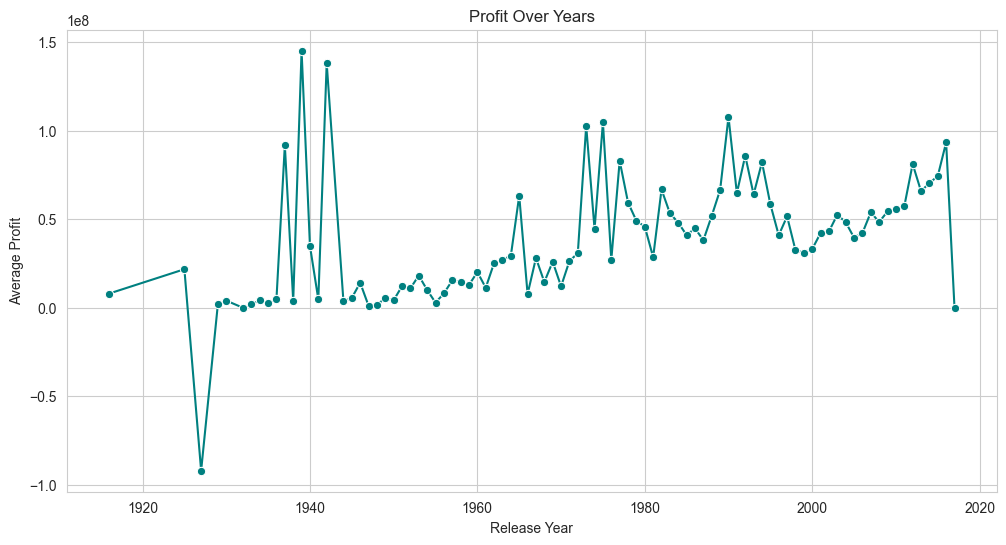

In [ ]:
# Time Series Plot of Profit Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='profit', data=df.groupby('release_year')['profit'].mean().reset_index(),
             marker='o', color='teal')
plt.title('Profit Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Profit')
plt.show()

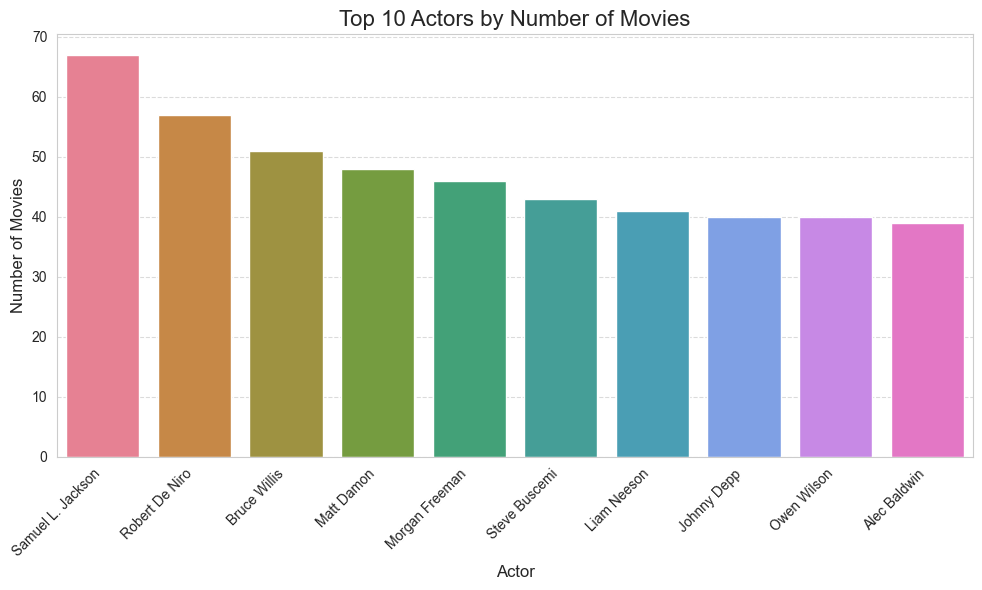

In [ ]:
# Apply a lambda function to each row in the 'cast' column to extract actors
actors = df['cast'].apply(lambda cast_list: [actor['name'] for actor in cast_list])

# Flatten the list of actors
actors_flat = [actor for sublist in actors for actor in sublist]

# Count occurrences of each actor
top_10_actors = pd.Series(actors_flat).value_counts().head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_actors.index, y=top_10_actors.values, palette='husl')
plt.title('Top 10 Actors by Number of Movies', fontsize=16)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

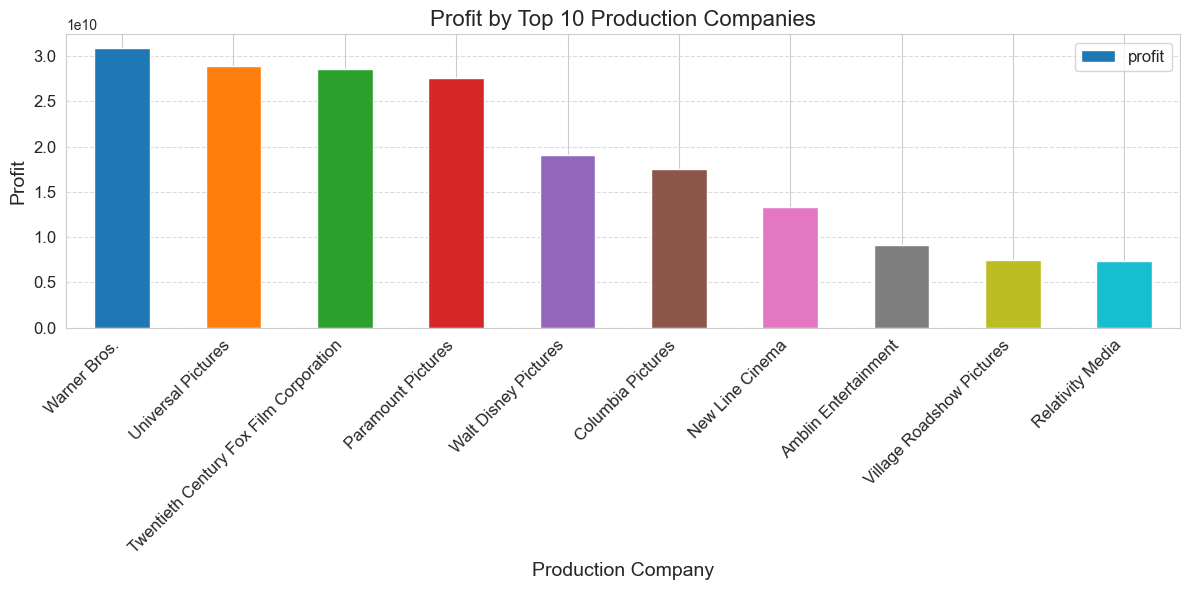

In [ ]:
# Extract top 10 production companies
top_production_companies = df['production_companies'].explode().value_counts().nlargest(10).index

# Filter the DataFrame to include only movies from the top production companies
df_top_production = df[df['production_companies'].apply(lambda x: any(company in top_production_companies for company in x))]

# Calculate profit for each production company
production_profit = df_top_production.explode('production_companies').groupby('production_companies')['profit'].sum().sort_values(ascending=False)

# Filter to include only the top 10 production companies
production_profit = production_profit.head(10)

# Define custom colors for the plot
colors = plt.cm.tab10.colors

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
production_profit.plot(kind='bar', stacked=True, color=colors)
plt.title('Profit by Top 10 Production Companies', fontsize=16)
plt.xlabel('Production Company', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


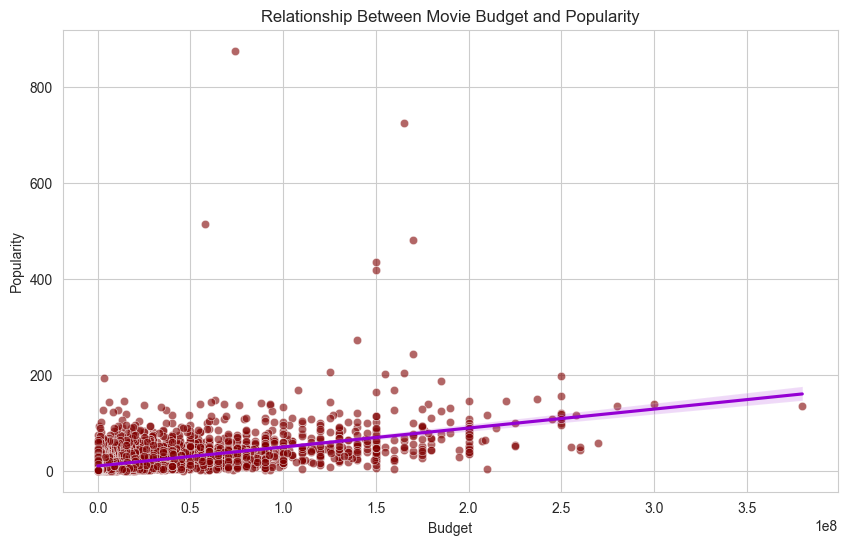

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='popularity', data=df, color='maroon', alpha=0.6)

# Add a linear regression line
sns.regplot(x='budget', y='popularity', data=df, scatter=False, color='darkviolet')

# Set axis labels and title
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Relationship Between Movie Budget and Popularity')

# Show the plot
plt.show()


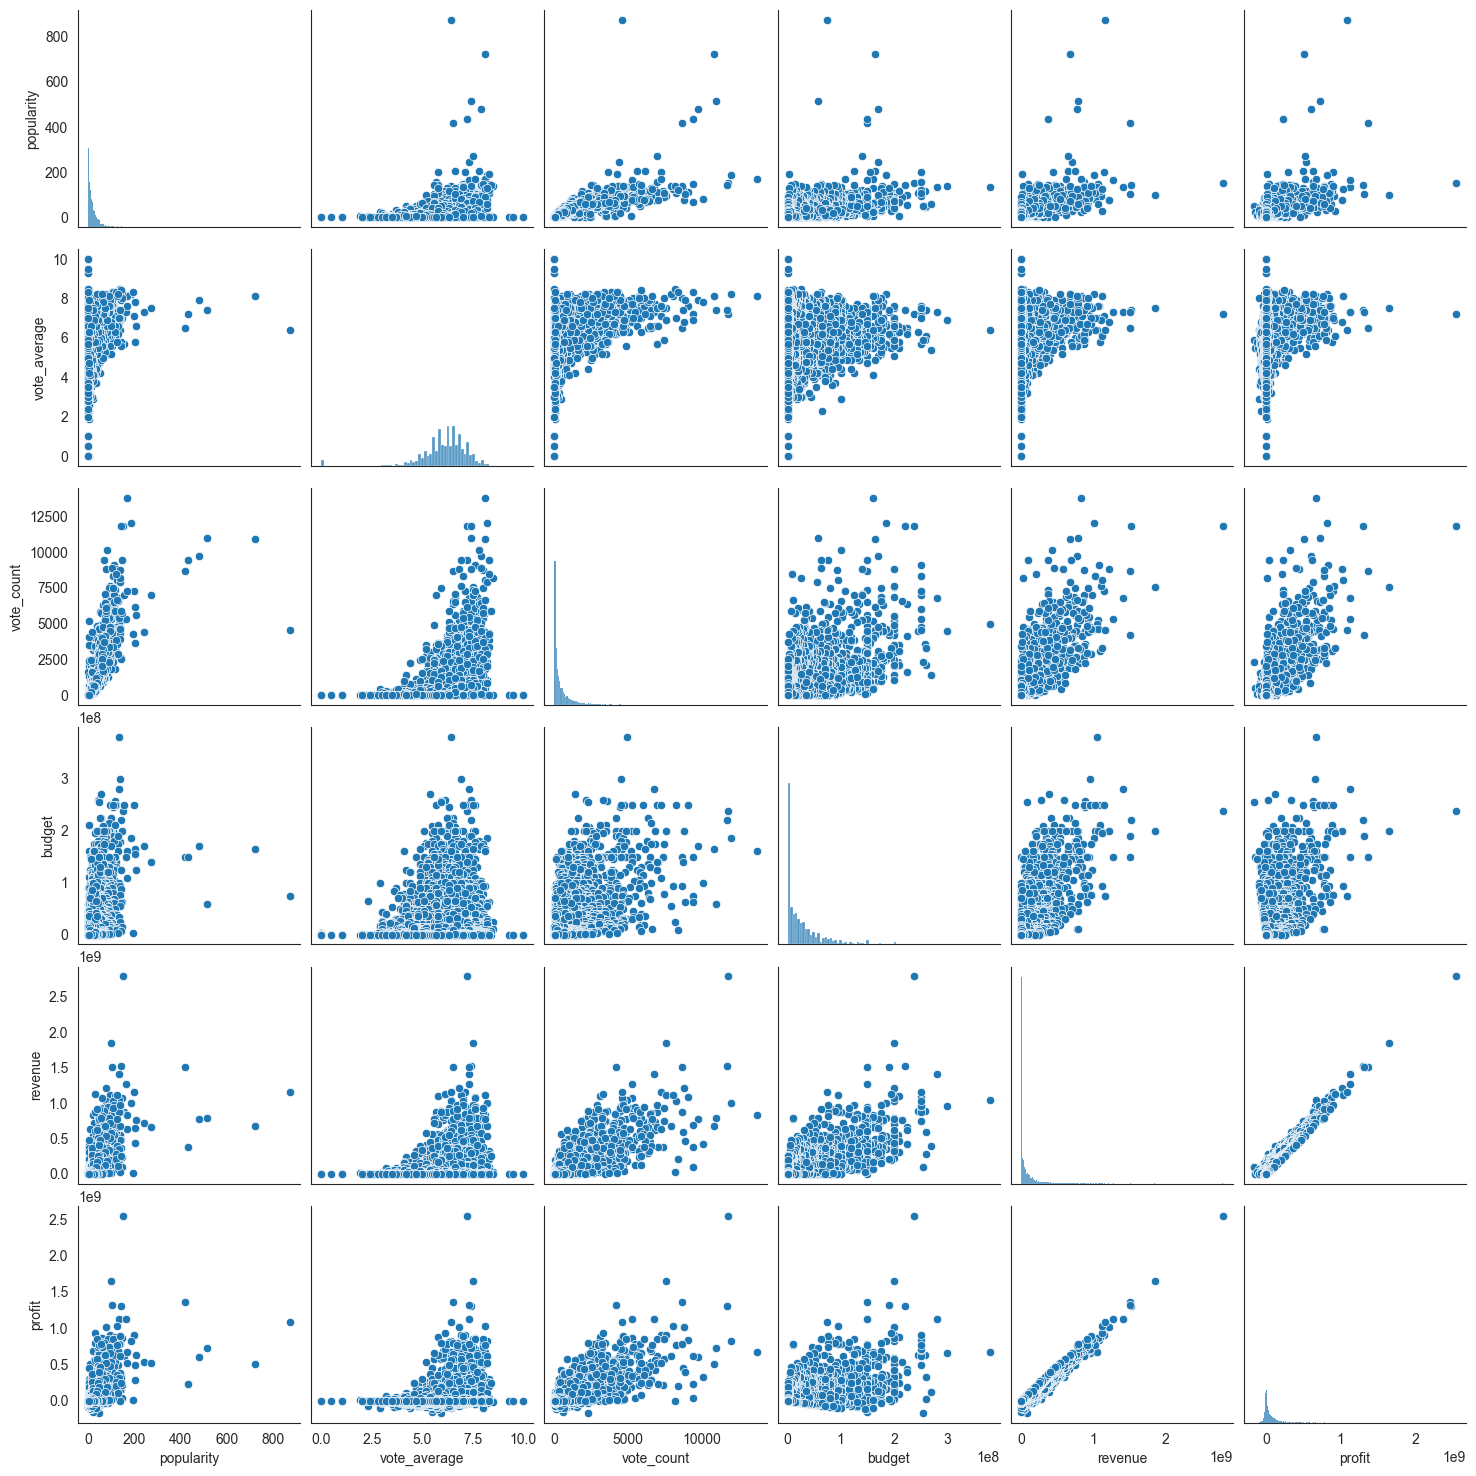

In [ ]:
relevant_columns = ['popularity', 'vote_average', 'vote_count', 'budget', 'revenue', 'profit']

# Create a pairplot
sns.pairplot(df[relevant_columns])
plt.show()


# Data Modeling

In [29]:
df = df.dropna(subset=['cast_id', 'director_id'])
df.shape

(4751, 24)

In [92]:
# Concatenate encoded features with the selected features to create X dataframe
selected_features = df[['popularity', 'vote_average', 'budget', 'revenue', 'genres_id', 'keywords_id', 'runtime',
                        'cast_id', 'director_id', 'production_companies_id', 'release_month', 'release_year', 'profit'
                        # 'original_language', 'production_countries'
                        ]]

In [93]:
selected_features['genres_id'] = df['genres_id'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
selected_features['keywords_id'] = df['keywords_id'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
selected_features['production_companies_id'] = df['production_companies_id'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
# X_df['production_countries'] = df['production_countries'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


In [97]:
# Drop rows with missing values
selected_features.dropna(inplace=True)

In [54]:
# # Treat the numerical lists and categorical columns as separate features and apply one-hot encoding
# mlb = MultiLabelBinarizer()

# # One-hot encode 'genres_id', 'keywords_id', 'production_companies_id'
# for col in ['genres_id', 'keywords_id', 'production_companies_id',
#             'production_countries', 'original_language']:
#     encoded_features = pd.DataFrame(mlb.fit_transform(X_df[col]), columns=[f"{col}_{i}" for i in mlb.classes_], index=X_df.index)
#     X_df = pd.concat([X_df, encoded_features], axis=1)

# # Drop the original columns after encoding
# X_df.drop(columns=['genres_id', 'keywords_id', 'production_companies_id',
#                    'production_countries', 'original_language'], inplace=True)

In [110]:
# Create X without the 'profit' column
X = selected_features.drop(columns=['profit'])

# Create y with only the 'profit' column
y = (selected_features['profit'] > 0).astype(int)


In [111]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
print(X_scaled[:5])

[[ 3.80358387  1.00848389  4.84528758 15.72796006 -0.25220231 -0.21816475
   2.56889294  0.04164221 -0.35581498 -0.33679172  1.50397246  0.54740802]
 [ 3.46143276  0.69941291  6.33882203  5.06317671 -0.25882041 -0.25393878
   2.90691185 -0.29048267 -0.36009876 -0.36662965 -0.55694079  0.39133095]
 [ 2.50606332  0.08127094  5.03494274  4.59428275 -0.25220231 -0.24794146
   1.89285511 -0.24647154 -0.3671887  -0.36631776  0.9151401   1.0156392 ]
 [ 2.65480123  1.42057854  5.15347722  5.78666269 -0.25220231 -0.23657653
   2.71375818 -0.27121167 -0.36511921 -0.27087796  0.03189157  0.78152361]
 [ 0.59417522 -0.12477639  5.39054618  1.11204764 -0.25220231 -0.23750612
   1.12024045  0.01720058 -0.36732497 -0.36662965 -1.14577315  0.78152361]]


In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3345, 12)
Shape of X_test: (837, 12)
Shape of y_train: (3345,)
Shape of y_test: (837,)


## Logistic Regression

In [113]:
# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       333
           1       0.97      0.90      0.93       504

    accuracy                           0.92       837
   macro avg       0.92      0.93      0.92       837
weighted avg       0.93      0.92      0.92       837

Accuracy: 0.9235364396654719


# Evaluation

# Recommender System